In [9]:
import warnings
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.12.0


In [2]:
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

import json

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
df = pd.read_json('/content/drive/MyDrive/Sarcasm_Headlines_Dataset.json', lines=True)

In [5]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [7]:
df['is_sarcastic'].value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

In [8]:
df['len'] = df['headline'].apply(lambda x:len(x.split(" ")))
df.head()

,article_link,headline,is_sarcastic,len
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0,12
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0,14
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1,14
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1,13
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0,11


In [10]:
len(df)

26709

In [11]:
df['len'].describe()

count   26709.0000000
mean        9.8478416
std         3.1720994
min         2.0000000
25%         8.0000000
50%        10.0000000
75%        12.0000000
max        39.0000000
Name: len, dtype: float64

<Axes: xlabel='len', ylabel='Density'>

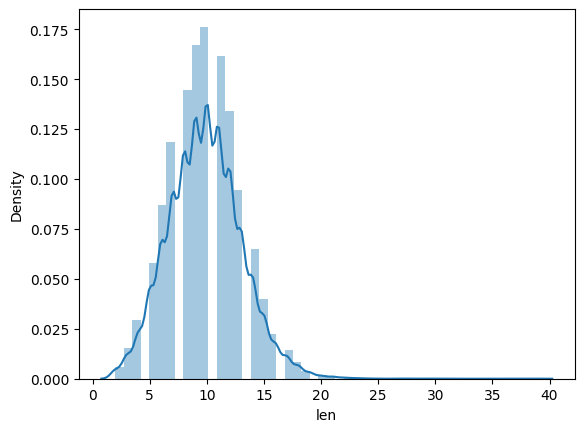

In [12]:
sns.distplot(df['len'])

<Axes: xlabel='len'>

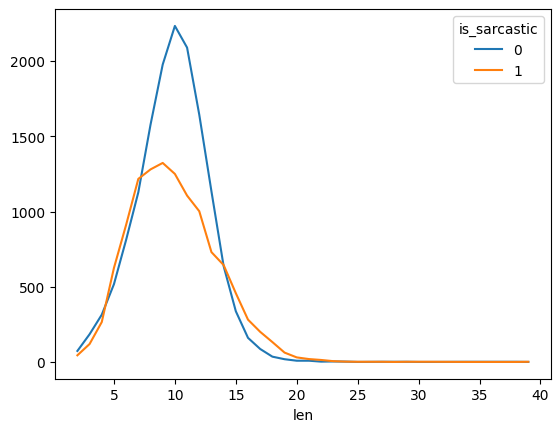

In [13]:
pd.crosstab (df['len'],df['is_sarcastic']).plot()

We can see that Sarcastic message length is more as compared to non-sarcastic

In [14]:
df['text']= df['headline'].apply (lambda x: x.lower())

In [15]:
from nltk.corpus import stopwords
# Removing stop words
import string
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
df['text'] = df['text'].apply(lambda words: ' '.join(word for word in words.split() if word not in stop))


In [17]:
# Remove punctuations
df['text'] = df['text'].str.replace('[^\w\s]','')

In [18]:
df.head(5)

,article_link,headline,is_sarcastic,len,text
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0,12,former versace store clerk sues secret black c...
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0,14,roseanne revival catches thorny political mood...
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1,14,mom starting fear sons web series closest thin...
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1,13,boehner wants wife listen come alternative deb...
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0,11,jk rowling wishes snape happy birthday magical...


In [19]:
max_features = 10000
maxlen = 25
embedding_size = 50

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=max_features)

tokenizer.fit_on_texts(list(df['headline']))

X = tokenizer.texts_to_sequences(df['headline'])

print("Number of Samples:", len(X))       
print(X[0]) 

Number of Samples: 26709
[307, 678, 3336, 2297, 47, 381, 2575, 5, 2576, 8433]


In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

X = pad_sequences(X, maxlen = maxlen)     
y = np.asarray(df['is_sarcastic'])

print("Number of Labels: ", len(y))     
print(y[0])

Number of Labels:  26709
0


In [22]:
X.shape

(26709, 25)

In [23]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

29657


In [24]:
EMBEDDING_FILE = '/content/drive/MyDrive/glove.6B.50d.txt'
embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

In [25]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 50))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [26]:
print (len(embeddings))

400000


In [27]:
print(embedding_matrix.shape)

(29657, 50)


In [28]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [29]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y_encoded = enc.fit_transform(y.reshape(-1,1))
y_encoded

<26709x2 sparse matrix of type '<class 'numpy.float64'>'
	with 26709 stored elements in Compressed Sparse Row format>

In [30]:
from tensorflow.keras.utils import to_categorical
y_en = to_categorical(y, num_classes=6)
y_en[0]

array([1., 0., 0., 0., 0., 0.], dtype=float32)

In [31]:
y_encoded = y_encoded.todense()
y_encoded

matrix([[1., 0.],
        [1., 0.],
        [0., 1.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]])

In [32]:
X
print(X.shape)

(26709, 25)


In [36]:
X = df['text']
y = df['is_sarcastic']

In [37]:
#Splitting the data into train and test set using default size
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df['text'],y,test_size=0.25)


In [38]:
max_words = 1000
max_len = 100

In [39]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences


tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [41]:
# define model

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop, SGD, Adam



def rnn_model():
    # create model
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='Features')(layer)
    layer = Activation('relu')(layer)
    layer = Dense(1,name='Out')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

model = rnn_model()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy']) ### Loss function = binary cross entropy

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 100)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 100, 50)           50000     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 Features (Dense)            (None, 256)               16640     
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 Out (Dense)                 (None, 1)                 257       
                                                                 
 activation_3 (Activation)   (None, 1)                 0   

In [42]:
training_history = model.fit(sequences_matrix,Y_train,batch_size=32,epochs=20,
          validation_split=0.2)

Epoch 1/20
501/501 [==============================] - 49s 89ms/step - loss: 0.5565 - accuracy: 0.6978 - val_loss: 0.5159 - val_accuracy: 0.7327
Epoch 2/20
501/501 [==============================] - 44s 88ms/step - loss: 0.4843 - accuracy: 0.7549 - val_loss: 0.5094 - val_accuracy: 0.7360
Epoch 3/20
501/501 [==============================] - 41s 83ms/step - loss: 0.4658 - accuracy: 0.7640 - val_loss: 0.5136 - val_accuracy: 0.7365
Epoch 4/20
501/501 [==============================] - 47s 93ms/step - loss: 0.4426 - accuracy: 0.7747 - val_loss: 0.5291 - val_accuracy: 0.7232
Epoch 5/20
501/501 [==============================] - 44s 87ms/step - loss: 0.4238 - accuracy: 0.7849 - val_loss: 0.5550 - val_accuracy: 0.7285
Epoch 6/20
501/501 [==============================] - 44s 88ms/step - loss: 0.4068 - accuracy: 0.7926 - val_loss: 0.5453 - val_accuracy: 0.7237
Epoch 7/20
501/501 [==============================] - 44s 88ms/step - loss: 0.3904 - accuracy: 0.7999 - val_loss: 0.5703 - val_accuracy:

In [43]:

test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

per = model.evaluate(test_sequences_matrix,Y_test)

209/209 [==============================] - 5s 26ms/step - loss: 1.8727 - accuracy: 0.6854


In [44]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(per[0],per[1]))

Test set
  Loss: 1.873
  Accuracy: 0.685


In [45]:
#Naive Bayes Model
#Splitting the data into train and test set using default size
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df['text'],y,test_size=0.25)


In [46]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [47]:
# learn training data vocabulary, then use it to create a document-term matrix
X_train_transformed = vectorizer.transform(X_train)

In [48]:
X_test_transformed = vectorizer.transform(X_test)

In [49]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [50]:
nb.fit(X_train_transformed, Y_train)

MultinomialNB()

In [51]:
# make class predictions for X_test
y_pred_class = nb.predict(X_test_transformed)

In [52]:
from sklearn import metrics
from sklearn.metrics import accuracy_score 
metrics.accuracy_score(Y_train, nb.predict(X_train_transformed))

0.9248664569916629

In [53]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(Y_test, y_pred_class)

0.8039832285115304

In [54]:
# print the confusion matrix
metrics.confusion_matrix(Y_test, y_pred_class)

array([[3198,  568],
       [ 741, 2171]])

# Conclusion and Interpretation

We can see above that LSTM gave accuracy of 68% and Naive Bayes gave a better accuracy of 80%.